In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
land = pd.read_csv('../data/산사태 발생이력.csv', encoding = 'cp949')

### 1) 산사태 발생 이력만 가지고 클러스터링

In [3]:
land['sgg'] = land['sgg'].apply(lambda X: X+' ')
land['region'] = land['sgg']+land['umd']

In [4]:
region_sum = land.groupby('region').sum()

(array([206.,  16.,   8.,   5.,   2.,   2.,   1.,   1.,   1.,   1.]),
 array([ 1. ,  7.8, 14.6, 21.4, 28.2, 35. , 41.8, 48.6, 55.4, 62.2, 69. ]),
 <a list of 10 Patch objects>)

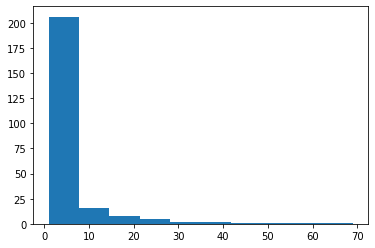

In [5]:
#2011.07~2019.10 기간 동안 각 지역에서 발생한 산사태 총 건수 히스토그램
plt.hist(region_sum['sum_cnt'])

In [6]:
print('산사태가 가장 많이 발생한 지역 : 창수면 69번')
print('산사태 피해면적이 가장 넓은 지역 : 함양군 안의면 61.26')
print('산사태 피해면적이 가장 좁은 지역 : 영천시 완산동 0.02')

print('산사태 발생 건수가 10 이상인 지역 : ', len(region_sum[region_sum['sum_cnt']>10]),'곳')
print('산사태 발생 건수가 10 이하인 지역 : ', len(region_sum[region_sum['sum_cnt']<=10]),'곳')

산사태가 가장 많이 발생한 지역 : 창수면 69번
산사태 피해면적이 가장 넓은 지역 : 함양군 안의면 61.26
산사태 피해면적이 가장 좁은 지역 : 영천시 완산동 0.02
산사태 발생 건수가 10 이상인 지역 :  26 곳
산사태 발생 건수가 10 이하인 지역 :  217 곳


### 2) 토지도만 가지고 클러스터링

In [7]:
# 토지도 데이터 불러오기
SHP_south = gpd.read_file('../data/토지도/토양도_48_경상남도/TB_FGDI_FS_IJ5000_PG_48.shp')
SHP_north_1 = gpd.read_file('../data/토지도/토양도_47_경상북도/TB_FGDI_FS_IJ5000_PG_47_1.shp')
SHP_north_2 = gpd.read_file('../data/토지도/토양도_47_경상북도/TB_FGDI_FS_IJ5000_PG_47_2.shp')
SHP = pd.concat([SHP_south,SHP_north_1],axis=0)
SHP = pd.concat([SHP,SHP_north_2],axis=0)

In [8]:
# 행정동 경계 데이터 불러오기
boundary = gpd.read_file('../data/행정동 경계/umd.shp',encoding='utf-8')

In [61]:
# MultiPolygon type인 데이터 Polygon으로 분리
B_dict = {boundary['ADM_DR_CD'].iloc[i]:boundary['geometry'].iloc[i] for i in range(len(boundary))}
for i in range(len(boundary)):
    if boundary['geometry'].iloc[i].geom_type == "MultiPolygon":
        polys = []
        for poly in boundary['geometry'].iloc[i]:
            polys.append(poly)
        B_dict[boundary['ADM_DR_CD'].iloc[i]] = polys

토지도 데이터의 대표되는 컬럼을 찾고 싶은데 마땅한 컬럼이 없다.  
OBJ_ID와 (X,Y)가 중복인 데이터가 많다  
데이터의 키는 없나?

일단 OBJ_ID와 X좌표를 기준으로 정렬하여 index를 키로 사용  

In [101]:
SHP = SHP.sort_values(['OBJ_ID','ARA_XCRD']).reset_index().drop('index',axis=1)

In [110]:
#각 행정동에 해당되는 토지 데이터 분류
soil_dict = {k:[] for k in B_dict.keys()}
ID_list = list(SHP.index)

for B in B_dict.keys():
    print(B)
    print('남은 데이터 : ', len(ID_list))
    if type(B_dict[B]) == list:
        pass
    else:
        for i in ID_list:
            if B_dict[B].contains(SHP['geometry'].iloc[i]):
                soil_dict[B].append(i)
                ID_list.remove(i)
            else:
                pass
print('남은 데이터 : ', len(ID_list))
for B in B_dict.keys():
    print(B)
    print('남은 데이터 : ', len(ID_list))
    
    if type(B_dict[B]) == list:
        print(len(B_dict[B]))
        for b in B_dict[B]:
            for i in ID_list:
                if b.contains(SHP['geometry'].iloc[i]):
                    soil_dict[B].append(i)
                    ID_list.remove(i)
                else:
                    pass
    else:
        pass

3701111
남은 데이터 :  574135
3701112
남은 데이터 :  574135
3701113
남은 데이터 :  573902
3701131
남은 데이터 :  573896
3701132
남은 데이터 :  573890
3701133
남은 데이터 :  573890
3701135
남은 데이터 :  573890
3701155
남은 데이터 :  573890
3701156
남은 데이터 :  573890
3701157
남은 데이터 :  573890
3701158
남은 데이터 :  573890
3701159
남은 데이터 :  573819
3701160
남은 데이터 :  573733
3701161
남은 데이터 :  573733
3701211
남은 데이터 :  573733
3701231
남은 데이터 :  573733
3701232
남은 데이터 :  573148
3701233
남은 데이터 :  573148
3701234
남은 데이터 :  573148
3701235
남은 데이터 :  572241
3701236
남은 데이터 :  571135
3701258
남은 데이터 :  570820
3701261
남은 데이터 :  570778
3701263
남은 데이터 :  570695
3701264
남은 데이터 :  570573
3701265
남은 데이터 :  570562
3701266
남은 데이터 :  570432
3701267
남은 데이터 :  570377
3701268
남은 데이터 :  570361
3702011
남은 데이터 :  570361
3702012
남은 데이터 :  570361
3702013
남은 데이터 :  569990
3702014
남은 데이터 :  569913
3702031
남은 데이터 :  569347
3702032
남은 데이터 :  569347
3702033
남은 데이터 :  569347
3702034
남은 데이터 :  568802
3702035
남은 데이터 :  567417
3702036
남은 데이터 :  567020
3702037
남은 데이터 :  566998


3742040
남은 데이터 :  316115
3743011
남은 데이터 :  316115
3743031
남은 데이터 :  316115
3743032
남은 데이터 :  316115
3803011
남은 데이터 :  316115
3803031
남은 데이터 :  315623
3803032
남은 데이터 :  315035
3803033
남은 데이터 :  314567
3803034
남은 데이터 :  314115
3803035
남은 데이터 :  313558
3803036
남은 데이터 :  313219
3803037
남은 데이터 :  312686
3803038
남은 데이터 :  312153
3803039
남은 데이터 :  311712
3803040
남은 데이터 :  310934
3803041
남은 데이터 :  310587
3803042
남은 데이터 :  309894
3803043
남은 데이터 :  309148
3803044
남은 데이터 :  307997
3803045
남은 데이터 :  307419
3803065
남은 데이터 :  306648
3803066
남은 데이터 :  306648
3803067
남은 데이터 :  306469
3803068
남은 데이터 :  306434
3803069
남은 데이터 :  306434
3803070
남은 데이터 :  306310
3803071
남은 데이터 :  306049
3803072
남은 데이터 :  305938
3803073
남은 데이터 :  305842
3803074
남은 데이터 :  305841
3803075
남은 데이터 :  305809
3803076
남은 데이터 :  305798
3803077
남은 데이터 :  305798
3803078
남은 데이터 :  305770
3805011
남은 데이터 :  305745
3805031
남은 데이터 :  305745
3805032
남은 데이터 :  305745
3805033
남은 데이터 :  305745
3805034
남은 데이터 :  305745
3805035
남은 데이터 :  305745


3701234
남은 데이터 :  192516
3701235
남은 데이터 :  192516
3701236
남은 데이터 :  192516
3701258
남은 데이터 :  192516
3701261
남은 데이터 :  192516
3701263
남은 데이터 :  192516
3701264
남은 데이터 :  192516
3701265
남은 데이터 :  192516
3701266
남은 데이터 :  192516
3701267
남은 데이터 :  192516
3701268
남은 데이터 :  192516
3702011
남은 데이터 :  192516
46
3702012
남은 데이터 :  192516
3702013
남은 데이터 :  192516
3702014
남은 데이터 :  192516
3702031
남은 데이터 :  192516
8
3702032
남은 데이터 :  192516
35
3702033
남은 데이터 :  192281
3702034
남은 데이터 :  192281
3702035
남은 데이터 :  192281
3702036
남은 데이터 :  192281
3702037
남은 데이터 :  192281
3702038
남은 데이터 :  192281
3702051
남은 데이터 :  192281
3702055
남은 데이터 :  192281
3702058
남은 데이터 :  192281
3702059
남은 데이터 :  192281
3702062
남은 데이터 :  192281
3702063
남은 데이터 :  192281
3702064
남은 데이터 :  192281
3702066
남은 데이터 :  192281
3702067
남은 데이터 :  192281
3702068
남은 데이터 :  192281
3702069
남은 데이터 :  192281
3703011
남은 데이터 :  192281
3703031
남은 데이터 :  192281
3703032
남은 데이터 :  192281
3703033
남은 데이터 :  192281
3703034
남은 데이터 :  192281
3703035
남은 데이터 : 

3805031
남은 데이터 :  182476
31
3805032
남은 데이터 :  182185
29
3805033
남은 데이터 :  181622
12
3805034
남은 데이터 :  181086
328
3805035
남은 데이터 :  181086
495
3805036
남은 데이터 :  180849
117
3805052
남은 데이터 :  180849
2
3805053
남은 데이터 :  180789
3805054
남은 데이터 :  180789
3
3805055
남은 데이터 :  180764
3805056
남은 데이터 :  180764
3805062
남은 데이터 :  180764
15
3805063
남은 데이터 :  180675
3805064
남은 데이터 :  180675
4
3806011
남은 데이터 :  180633
3806031
남은 데이터 :  180633
3806032
남은 데이터 :  180633
3806033
남은 데이터 :  180633
5
3806034
남은 데이터 :  180302
3806035
남은 데이터 :  180302
2
3806036
남은 데이터 :  179172
3806037
남은 데이터 :  179172
50
3806051
남은 데이터 :  178185
57
3806052
남은 데이터 :  178072
3806053
남은 데이터 :  178072
5
3806055
남은 데이터 :  178071
3806057
남은 데이터 :  178071
14
3806059
남은 데이터 :  177950
8
3807011
남은 데이터 :  177537
3807032
남은 데이터 :  177537
3807033
남은 데이터 :  177537
3807034
남은 데이터 :  177537
3807035
남은 데이터 :  177537
3807036
남은 데이터 :  177537
3807037
남은 데이터 :  177537
3807051
남은 데이터 :  177537
3807052
남은 데이터 :  177537
3807053
남은 데이터 :  177537
380

In [131]:
# 각 행정동에 포함이 안되는 토지 데이터 존재.....
soil_dict['anywhere'] = ID_list

In [132]:
# 분류에 시간이 오래 걸려 분류 정보를 pickle 형태로 저장
import pickle
with open('soil.pickle','wb') as fw:
    pickle.dump(soil_dict, fw)

No handles with labels found to put in legend.


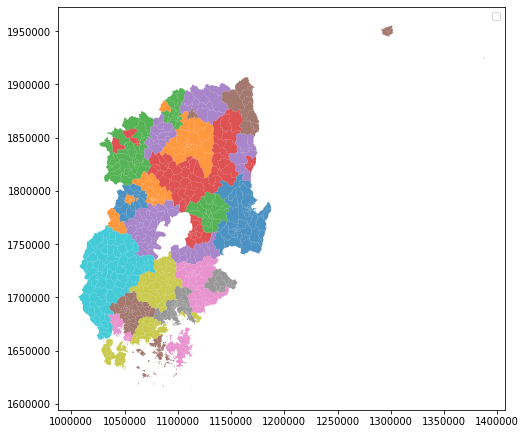

In [115]:
# 행정동 경계 데이터 시각화
ax = boundary.plot(column="ADM_DR_CD", figsize=(8,8), alpha=0.8)
plt.legend()
plt.show()

No handles with labels found to put in legend.


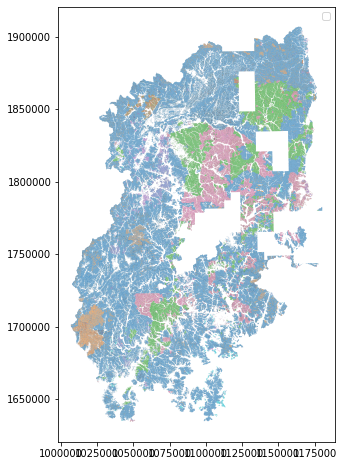

In [9]:
# 토지도 데이터 시각화
SHP.plot(column="MAP_LABEL", figsize=(8,8), alpha=0.8)
plt.legend()
plt.show()

No handles with labels found to put in legend.


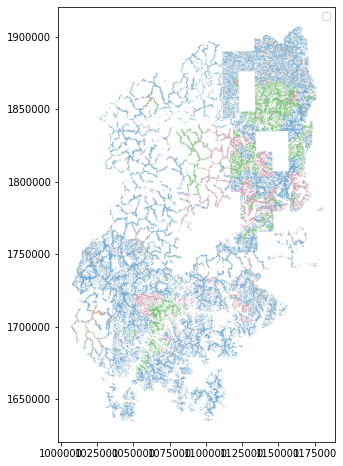

In [130]:
# 어느 지역에도 포함되지 않은 데이터 시각화
SHP.iloc[ID_list].plot(column="MAP_LABEL", figsize=(8,8), alpha=0.8)
plt.legend()
plt.show()

In [134]:
include_data = []
for i in soil_dict.keys():
    if len(soil_dict[i]) > 0:
        include_data.append(i)

In [143]:
print(' 총 행정동 수 : ',len(soil_dict.keys()),'\n','가진 데이터 개수가 0인 행정동 수 : ',len(soil_dict.keys())-len(include_data))

 총 행정동 수 :  638 
 가진 데이터 개수가 0인 행정동 수 :  27


In [138]:
boundary

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry
0,20200630,3701111,구룡포읍,"MULTIPOLYGON (((1184734.239 1774617.254, 11847..."
1,20200630,3701112,연일읍,"POLYGON ((1160923.832 1786524.018, 1160962.498..."
2,20200630,3701113,오천읍,"POLYGON ((1172424.168 1778414.742, 1172426.383..."
3,20200630,3701131,대송면,"POLYGON ((1167538.928 1778439.770, 1167541.585..."
4,20200630,3701132,동해면,"MULTIPOLYGON (((1181368.959 1784712.163, 11813..."
...,...,...,...,...
632,20200630,3840042,쌍백면,"POLYGON ((1056287.745 1722189.578, 1056335.116..."
633,20200630,3840043,삼가면,"POLYGON ((1052540.942 1719533.002, 1052573.371..."
634,20200630,3840044,가회면,"POLYGON ((1044199.527 1722837.244, 1044218.563..."
635,20200630,3840045,대병면,"POLYGON ((1046756.129 1730112.827, 1046808.008..."


In [ ]:
for i in soil_dict.keys():
    print(boundary[boundary['ADM_DR_CD']==i]['ADM_DR_NM'].iloc[0], len(soil_dict[i]))

### 생각해볼 점  
- 행정동에 포함되지 않은 데이터 처리를 할 것인가, 말 것인가, 처리를 한다면 어떻게 할 것인가  
- 행정동에 포함된 데이터 개수가 일정하지 않다. 어떤 데이터를 대표로 둘 것인지  
> 이에 대한 의견_1. 토지 데이터를 클러스터링하여 많은 클러스터링 인덱스를 가지는 그룹을 대표로 선정  
- 임상도 데이터도 토지도 데이터와 비슷할 것으로 예상  
- 먼저 지상관측 데이터를 이용하여 지역 클러스터링 진행  

### ASOS,AWS 데이터를 이용하여 클러스터링